## 📌 Dataset Columns Description

Below is a detailed description of each column in the dataset:

| Column Name     | Description |
|-----------------|-------------|
| name        | The name/model of the car (e.g., Maruti Swift, Hyundai i20). |
| year        | The manufacturing year of the car. Helps determine age and depreciation. |
| selling_price | The price at which the car is being sold (target variable for prediction). |
| km_driven   | Total kilometers the car has been driven. Indicates usage and wear. |
| fuel        | Type of fuel used by the car (e.g., Petrol, Diesel, CNG). |
| seller_type | Who is selling the car — Dealer, Individual, etc. |
| transmission | Type of transmission — Manual or Automatic. |
| owner       | Ownership history (e.g., First Owner, Second Owner, etc.). |

In [53]:
import warnings 
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
data = pd.read_csv("..\data\car_data.csv")

In [55]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007.0,NaN,70000.0,Petrrol,NaN,Manual,First Owner
1,Maruti Wagon R LXI Minor,NaN,135000.0,50000.0,Petorl,Indvidual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012.0,600000.0,100000.0,Deisel,Indvidual,Manual,First Owner
3,Datsun RediGO T Option,2017.0,250000.0,46000.0,Petorl,Indivudal,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014.0,450000.0,141000.0,Diesl,Indivudal,Manual,Second Owner


In [56]:
data.shape

(4345, 8)

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           4017 non-null   object 
 1   year           4041 non-null   float64
 2   selling_price  4054 non-null   float64
 3   km_driven      4026 non-null   object 
 4   fuel           4042 non-null   object 
 5   seller_type    4056 non-null   object 
 6   transmission   4040 non-null   object 
 7   owner          4059 non-null   object 
dtypes: float64(2), object(6)
memory usage: 271.7+ KB


In [58]:
data["car_name"] = data["name"].str.split(" ", n=1, expand=True)[0]
data["car_model"] = data["name"].str.split(" ", n=1, expand=True)[1]
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,car_name,car_model
0,Maruti 800 AC,2007.0,NaN,70000.0,Petrrol,NaN,Manual,First Owner,Maruti,800 AC
1,Maruti Wagon R LXI Minor,NaN,135000.0,50000.0,Petorl,Indvidual,Manual,First Owner,Maruti,Wagon R LXI Minor
2,Hyundai Verna 1.6 SX,2012.0,600000.0,100000.0,Deisel,Indvidual,Manual,First Owner,Hyundai,Verna 1.6 SX
3,Datsun RediGO T Option,2017.0,250000.0,46000.0,Petorl,Indivudal,Manual,First Owner,Datsun,RediGO T Option
4,Honda Amaze VX i-DTEC,2014.0,450000.0,141000.0,Diesl,Indivudal,Manual,Second Owner,Honda,Amaze VX i-DTEC


In [59]:
data['car_name'].unique()

array(['Maruti', 'Hyundai', 'Datsun', 'Honda', nan, 'Tata', 'Toyota',
       'Chevrolet', 'Mercedes-Benz', 'Audi', 'Skoda', 'Jeep', 'BMW',
       'Mahindra', 'Ford', 'Renault', 'Fiat', 'Volvo', 'Nissan', 'Jaguar',
       'Volkswagen', 'Mitsubishi', 'Land', 'Daewoo', 'MG', 'Force',
       'Isuzu', 'OpelCorsa', 'Ambassador', 'Kia'], dtype=object)

In [60]:
data['car_model'].str.lower().unique().tolist()

['800 ac',
 'wagon r lxi minor',
 'verna 1.6 sx',
 'redigo t option',
 'amaze vx i-dtec',
 'alto lx bsiii',
 nan,
 'indigo grand petrol',
 'creta 1.6 vtvt s',
 'celerio green vxi',
 'corolla altis 1.8 vl cvt',
 'xcent 1.2 kappa s',
 'sail 1.2 base',
 'ciaz vxi plus',
 'venue sx opt diesel',
 'enjoy tcdi ltz 7 seater',
 'new c-class 220 cdi at',
 'vitara brezza zdi plus amt',
 'city v mt',
 'tigor 1.2 revotron xt',
 'a6 2.0 tdi  design edition',
 'new c-class c 220 cdi avantgarde',
 'superb ambition 2.0 tdi cr at',
 'corolla altis g at',
 'innova 2.5 g (diesel) 7 seater',
 'compass 1.4 sport plus bsiv',
 'e-class e 200 cgi elegance',
 '3 series 320d sport line',
 'q7 35 tdi quattro premium',
 'elantra crdi s',
 'scorpio 1.99 s10',
 'city i dtec v',
 'wagon r vxi bs iv with abs',
 'wagon r vxi bs iv',
 'scorpio lx',
 'santro xing gls',
 'grand i10 1.2 kappa asta',
 'alto lxi',
 'swift dzire vdi optional',
 'eeco 5 seater ac bsiv',
 'i20 sportz 1.4 crdi',
 'omni maruti omni mpi std bsiii 

In [61]:
data['fuel'].unique()

array(['Petrrol', 'Petorl', 'Deisel', 'Diesl', 'Petrl', 'CNG', nan, 'LPG',
       'Electric'], dtype=object)

In [62]:
data['seller_type'].unique()

array([nan, 'Indvidual', 'Indivudal', 'Deelar', 'Dealerr',
       'Trustmark Dealer'], dtype=object)

In [63]:
data[data['owner'].isna() & data['seller_type'].isna()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,car_name,car_model
58,NaN,2016.0,665000.0,46000.0,Deisel,NaN,Manual,NaN,NaN,NaN
197,Mahindra Xylo E4,2009.0,229999.0,230000.0,Deisel,NaN,Manual,NaN,Mahindra,Xylo E4
421,Honda City i-DTEC V,2017.0,1044999.0,25000.0,Diesl,NaN,NaN,NaN,Honda,City i-DTEC V
473,Renault Duster 110PS Diesel RxZ,2012.0,490000.0,100000.0,Deisel,NaN,Manual,NaN,Renault,Duster 110PS Diesel RxZ
765,Hyundai i10 Sportz 1.2,2008.0,NaN,30000.0,Petrrol,NaN,Manual,NaN,Hyundai,i10 Sportz 1.2
1038,NaN,2015.0,300000.0,90000.0,Deisel,NaN,Manual,NaN,NaN,NaN
1264,NaN,NaN,300000.0,124000.0,Diesl,NaN,Manual,NaN,NaN,NaN
2131,NaN,2014.0,625000.0,68000.0,Deisel,NaN,Manual,NaN,NaN,NaN
3110,Mahindra Scorpio BSIV,2018.0,707000.0,60000.0,Diesl,NaN,Manual,NaN,Mahindra,Scorpio BSIV
3187,Maruti Swift Dzire LDI,2019.0,NaN,5000.0,NaN,NaN,Manual,NaN,Maruti,Swift Dzire LDI


In [64]:
data['owner'].unique()

array(['First Owner', 'Second Owner', nan, 'Fourth & Above Owner',
       'Third Owner', 'Test Drive Car'], dtype=object)

In [65]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(data):
    # Clean 'km_driven' column and convert to float
    data['km_driven'] = pd.to_numeric(data['km_driven'], errors='coerce')
    # Replace all instances of "Pe[a-z]+" with "Petrol" in column: 'fuel'
    data['fuel'] = data['fuel'].str.replace("Pe[a-z]+", "Petrol", case=False, regex=True)
    # Replace all instances of "D[a-z]+" with "Deisel" in column: 'fuel'
    data['fuel'] = data['fuel'].str.replace("D[a-z]+", "Deisel", case=False, regex=True)
    # Replace all instances of "In[a-z]+" with "Individual" in column: 'seller_type'
    data['seller_type'] = data['seller_type'].str.replace("In[a-z]+", "Individual", case=False, regex=True)
    # Replace all instances of "De[a-z]+" with "Dealer" in column: 'seller_type'
    data['seller_type'] = data['seller_type'].str.replace("De[a-z]+", "Dealer", case=False, regex=True)
    data['name'] = data['name'].fillna(
        data.groupby(['year','fuel','transmission'])['name']
          .transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan)
    )
    data['seller_type'] = data['seller_type'].fillna(
        data.groupby('owner')['seller_type']
          .transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan)
    )
    data['selling_price'] = data['selling_price'].fillna(
        data.groupby(['name', 'year', 'seller_type'])['selling_price']
          .transform(lambda x: x.median())
    )
    data['selling_price'] = data['selling_price'].fillna(
        data.groupby(['name', 'year'])['selling_price']
          .transform(lambda x: x.median())
    )
    data['fuel'] = data['fuel'].fillna(
        data.groupby(['name','year'])['fuel'].transform(
            lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan)
        )
    )
    data['fuel'] = data['fuel'].fillna(
        data.groupby(['name','transmission'])['fuel'].transform(
            lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan)
        )
    )
    data['year'] = data['year'].fillna(
        data.groupby('name')['year'].transform(lambda x: x.fillna(x.median()))
    )
    data['year'].fillna(data['year'].median(), inplace=True)
    data['km_driven'] = data.groupby('year')['km_driven'].transform(
        lambda x: x.fillna(x.median())
    )
    data['transmission'] = data['transmission'].fillna(
        data.groupby(['name','year'])['transmission'].transform(
            lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan)
        )
    )
    data['transmission'].fillna(data['transmission'].mode()[0], inplace=True)
    data['owner'] = data['owner'].fillna(
        data.groupby(['selling_price','seller_type'])['owner']
          .transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan)
    )
    data['selling_price'] = data['selling_price'].fillna(
        data.groupby(['km_driven', 'year', 'seller_type'])['selling_price']
          .transform(lambda x: x.median())
    )
    return data

data_clean = clean_data(data.copy())
data_clean.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,car_name,car_model
0,Maruti 800 AC,2007.0,77500.0,70000.0,Petrol,Individual,Manual,First Owner,Maruti,800 AC
1,Maruti Wagon R LXI Minor,2007.0,135000.0,50000.0,Petrol,Individual,Manual,First Owner,Maruti,Wagon R LXI Minor
2,Hyundai Verna 1.6 SX,2012.0,600000.0,100000.0,Deisel,Individual,Manual,First Owner,Hyundai,Verna 1.6 SX
3,Datsun RediGO T Option,2017.0,250000.0,46000.0,Petrol,Individual,Manual,First Owner,Datsun,RediGO T Option
4,Honda Amaze VX i-DTEC,2014.0,450000.0,141000.0,Deisel,Individual,Manual,Second Owner,Honda,Amaze VX i-DTEC


In [66]:
data_clean.isnull().sum()

name              75
year               0
selling_price     42
km_driven          1
fuel              78
seller_type       17
transmission       0
owner             46
car_name         328
car_model        328
dtype: int64

In [67]:
data_clean["car_name"] = data_clean["name"].str.split(" ", n=1, expand=True)[0]
data_clean["car_model"] = data_clean["name"].str.split(" ", n=1, expand=True)[1]
data_clean.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,car_name,car_model
0,Maruti 800 AC,2007.0,77500.0,70000.0,Petrol,Individual,Manual,First Owner,Maruti,800 AC
1,Maruti Wagon R LXI Minor,2007.0,135000.0,50000.0,Petrol,Individual,Manual,First Owner,Maruti,Wagon R LXI Minor
2,Hyundai Verna 1.6 SX,2012.0,600000.0,100000.0,Deisel,Individual,Manual,First Owner,Hyundai,Verna 1.6 SX
3,Datsun RediGO T Option,2017.0,250000.0,46000.0,Petrol,Individual,Manual,First Owner,Datsun,RediGO T Option
4,Honda Amaze VX i-DTEC,2014.0,450000.0,141000.0,Deisel,Individual,Manual,Second Owner,Honda,Amaze VX i-DTEC


In [68]:
data_clean[data_clean['year'] > 2025]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,car_name,car_model
2866,Toyota Innova 2.5 G4 Diesel 7-seater,3000.0,350000.0,140000.0,Deisel,Individual,Manual,Second Owner,Toyota,Innova 2.5 G4 Diesel 7-seater
4037,Maruti Celerio VXI Optional,2050.0,430999.0,14000.0,NaN,Dealer,Manual,First Owner,Maruti,Celerio VXI Optional


In [69]:
display(data_clean[data_clean['car_model'] == 'Celerio VXI Optional'])
display(data_clean[data_clean['car_model'] == 'Innova 2.5 G4 Diesel 7-seater'])

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,car_name,car_model
4037,Maruti Celerio VXI Optional,2050.0,430999.0,14000.0,NaN,Dealer,Manual,First Owner,Maruti,Celerio VXI Optional


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,car_name,car_model
2866,Toyota Innova 2.5 G4 Diesel 7-seater,3000.0,350000.0,140000.0,Deisel,Individual,Manual,Second Owner,Toyota,Innova 2.5 G4 Diesel 7-seater
2955,Toyota Innova 2.5 G4 Diesel 7-seater,2007.0,440000.0,223000.0,Deisel,Individual,Manual,Fourth & Above Owner,Toyota,Innova 2.5 G4 Diesel 7-seater


In [70]:
data_clean.loc[data_clean['year'] > 2025, 'year'] = 2007.0

In [71]:
display(data_clean[data_clean['car_model'] == 'Innova 2.5 G4 Diesel 7-seater'])

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,car_name,car_model
2866,Toyota Innova 2.5 G4 Diesel 7-seater,2007.0,350000.0,140000.0,Deisel,Individual,Manual,Second Owner,Toyota,Innova 2.5 G4 Diesel 7-seater
2955,Toyota Innova 2.5 G4 Diesel 7-seater,2007.0,440000.0,223000.0,Deisel,Individual,Manual,Fourth & Above Owner,Toyota,Innova 2.5 G4 Diesel 7-seater


In [72]:
data_clean[data_clean['year'] < 1990]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,car_name,car_model
997,Ford Endeavour 3.0L 4X4 AT,1890.0,NaN,NaN,Deisel,Individual,Automatic,NaN,Ford,Endeavour 3.0L 4X4 AT
1651,Toyota Etios Cross 1.2L G,1800.0,320000.0,60000.0,Petrol,Individual,Manual,First Owner,Toyota,Etios Cross 1.2L G


In [73]:
display(data_clean[data_clean['car_model'] == 'Etios Cross 1.2L G'])

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,car_name,car_model
843,Toyota Etios Cross 1.2L G,2015.0,320000.0,60000.0,Petrol,Individual,Manual,First Owner,Toyota,Etios Cross 1.2L G
950,Toyota Etios Cross 1.2L G,2015.0,421000.0,23839.0,Petrol,Individual,Manual,First Owner,Toyota,Etios Cross 1.2L G
1651,Toyota Etios Cross 1.2L G,1800.0,320000.0,60000.0,Petrol,Individual,Manual,First Owner,Toyota,Etios Cross 1.2L G
2947,Toyota Etios Cross 1.2L G,2015.0,421000.0,23839.0,Petrol,Dealer,Manual,First Owner,Toyota,Etios Cross 1.2L G


In [74]:
data_clean.loc[data_clean['year'] < 1970, 'year'] = 2015.0

In [75]:
data_clean['car_age'] = 2025 - data_clean['year']
data_clean['depreciation'] = np.where(data_clean['car_age'] > 30, 1,
                              np.where(data_clean['car_age'] > 15, 0.8,
                              np.where(data_clean['car_age'] > 12, 0.6,
                              np.where(data_clean['car_age'] > 9, 0.3, 0))))

In [76]:
data_clean.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,car_name,car_model,car_age,depreciation
0,Maruti 800 AC,2007.0,77500.0,70000.0,Petrol,Individual,Manual,First Owner,Maruti,800 AC,18.0,0.8
1,Maruti Wagon R LXI Minor,2007.0,135000.0,50000.0,Petrol,Individual,Manual,First Owner,Maruti,Wagon R LXI Minor,18.0,0.8
2,Hyundai Verna 1.6 SX,2012.0,600000.0,100000.0,Deisel,Individual,Manual,First Owner,Hyundai,Verna 1.6 SX,13.0,0.6
3,Datsun RediGO T Option,2017.0,250000.0,46000.0,Petrol,Individual,Manual,First Owner,Datsun,RediGO T Option,8.0,0.0
4,Honda Amaze VX i-DTEC,2014.0,450000.0,141000.0,Deisel,Individual,Manual,Second Owner,Honda,Amaze VX i-DTEC,11.0,0.3


In [77]:
data_clean.isna().sum()

name             75
year              0
selling_price    42
km_driven         1
fuel             78
seller_type      17
transmission      0
owner            46
car_name         75
car_model        75
car_age           0
depreciation      0
dtype: int64

In [78]:
data_clean.dropna(inplace=True)

In [79]:
data_clean.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
car_name         0
car_model        0
car_age          0
depreciation     0
dtype: int64

In [80]:
data_clean.shape

(4139, 12)

In [81]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4139 entries, 0 to 4344
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           4139 non-null   object 
 1   year           4139 non-null   float64
 2   selling_price  4139 non-null   float64
 3   km_driven      4139 non-null   float64
 4   fuel           4139 non-null   object 
 5   seller_type    4139 non-null   object 
 6   transmission   4139 non-null   object 
 7   owner          4139 non-null   object 
 8   car_name       4139 non-null   object 
 9   car_model      4139 non-null   object 
 10  car_age        4139 non-null   float64
 11  depreciation   4139 non-null   float64
dtypes: float64(5), object(7)
memory usage: 420.4+ KB


In [82]:
data_clean['selling_price'].max()

np.float64(8900000.0)

In [83]:
data_clean[data_clean['selling_price'] < 0]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,car_name,car_model,car_age,depreciation
853,Hyundai Verna 1.6 SX VTVT AT,2011.0,-50000.0,60000.0,Petrol,Individual,Automatic,Third Owner,Hyundai,Verna 1.6 SX VTVT AT,14.0,0.6
1741,Renault Duster 85PS Diesel RxL,2013.0,-9999.0,1000.0,Deisel,Dealer,Manual,Second Owner,Renault,Duster 85PS Diesel RxL,12.0,0.3
1820,Tata Manza Aura (ABS) Quadrajet BS IV,2012.0,-4500.0,155836.0,Deisel,Individual,Manual,Second Owner,Tata,Manza Aura (ABS) Quadrajet BS IV,13.0,0.6
2545,Tata Manza Aura (ABS) Quadrajet BS IV,2012.0,-4500.0,80000.0,Deisel,Individual,Manual,Second Owner,Tata,Manza Aura (ABS) Quadrajet BS IV,13.0,0.6
4094,Ford EcoSport 1.5 Petrol Titanium Plus AT BSIV,2015.0,-120000.0,48238.0,Petrol,Trustmark Dealer,Automatic,First Owner,Ford,EcoSport 1.5 Petrol Titanium Plus AT BSIV,10.0,0.3


In [84]:
data_clean.drop(data_clean[data_clean['selling_price'] < 0].index, inplace=True)

In [85]:
data_clean[data_clean['selling_price'] < 0]


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,car_name,car_model,car_age,depreciation


In [86]:
data_clean

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,car_name,car_model,car_age,depreciation
0,Maruti 800 AC,2007.0,77500.0,70000.0,Petrol,Individual,Manual,First Owner,Maruti,800 AC,18.0,0.8
1,Maruti Wagon R LXI Minor,2007.0,135000.0,50000.0,Petrol,Individual,Manual,First Owner,Maruti,Wagon R LXI Minor,18.0,0.8
2,Hyundai Verna 1.6 SX,2012.0,600000.0,100000.0,Deisel,Individual,Manual,First Owner,Hyundai,Verna 1.6 SX,13.0,0.6
3,Datsun RediGO T Option,2017.0,250000.0,46000.0,Petrol,Individual,Manual,First Owner,Datsun,RediGO T Option,8.0,0.0
4,Honda Amaze VX i-DTEC,2014.0,450000.0,141000.0,Deisel,Individual,Manual,Second Owner,Honda,Amaze VX i-DTEC,11.0,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...
4338,Hyundai Creta 1.6 CRDi SX Option,2016.0,865000.0,90000.0,Deisel,Individual,Manual,First Owner,Hyundai,Creta 1.6 CRDi SX Option,9.0,0.0
4339,Renault KWID RXT,2016.0,225000.0,40000.0,Petrol,Individual,Manual,First Owner,Renault,KWID RXT,9.0,0.0
4342,Hyundai Santro Xing GL Plus,2008.0,120000.0,41723.0,Petrol,Individual,Manual,Second Owner,Hyundai,Santro Xing GL Plus,17.0,0.8
4343,Honda Amaze VX i-DTEC,2014.0,450000.0,141000.0,Deisel,Individual,Manual,Second Owner,Honda,Amaze VX i-DTEC,11.0,0.3


In [87]:
data_clean[data_clean['km_driven'] > 5000000 ]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,car_name,car_model,car_age,depreciation
2102,Datsun RediGO S,2016.0,270000.0,50000000.0,Petrol,Individual,Manual,First Owner,Datsun,RediGO S,9.0,0.0
3594,Mahindra Scorpio VLX 2WD AIRBAG BSIV,2014.0,600000.0,9999999.0,Deisel,Individual,Manual,Second Owner,Mahindra,Scorpio VLX 2WD AIRBAG BSIV,11.0,0.3
3984,Maruti Zen LX,2000.5,85000.0,15000000.0,Petrol,Individual,Manual,Second Owner,Maruti,Zen LX,24.5,0.8
4218,Honda City i-DTEC VX,2017.0,1000000.0,8000000.0,Deisel,Individual,Manual,First Owner,Honda,City i-DTEC VX,8.0,0.0


In [88]:
data_clean[data_clean['km_driven'] < 10000 ]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,car_name,car_model,car_age,depreciation
27,Hyundai Venue SX Opt Diesel,2019.0,1195000.0,5000.0,Deisel,Dealer,Manual,First Owner,Hyundai,Venue SX Opt Diesel,6.0,0.0
31,Maruti Vitara Brezza ZDi Plus AMT,2018.0,975000.0,4500.0,Deisel,Dealer,Automatic,First Owner,Maruti,Vitara Brezza ZDi Plus AMT,7.0,0.0
88,Hyundai Creta 1.6 SX Option,2017.0,1025000.0,9000.0,Petrol,Dealer,Manual,First Owner,Hyundai,Creta 1.6 SX Option,8.0,0.0
89,Mercedes-Benz S-Class S 350d Connoisseurs Edition,2017.0,8150000.0,6500.0,Deisel,Dealer,Automatic,First Owner,Mercedes-Benz,S-Class S 350d Connoisseurs Edition,8.0,0.0
133,Chevrolet Cruze LTZ,2015.0,1000000.0,3600.0,Deisel,Dealer,Manual,First Owner,Chevrolet,Cruze LTZ,10.0,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...
4106,Ford Ecosport 1.5 Petrol Ambiente,2017.0,650000.0,6000.0,Petrol,Individual,Manual,First Owner,Ford,Ecosport 1.5 Petrol Ambiente,8.0,0.0
4158,Tata Nano Cx BSIII,2014.0,45000.0,7000.0,Petrol,Individual,Manual,Second Owner,Tata,Nano Cx BSIII,11.0,0.3
4194,Tata Tigor 1.2 Revotron XZ Option,2018.0,570000.0,5000.0,Petrol,Individual,Manual,First Owner,Tata,Tigor 1.2 Revotron XZ Option,7.0,0.0
4278,Honda Amaze S Petrol BSIV,2014.0,614000.0,1000.0,Petrol,Individual,Manual,First Owner,Honda,Amaze S Petrol BSIV,11.0,0.3


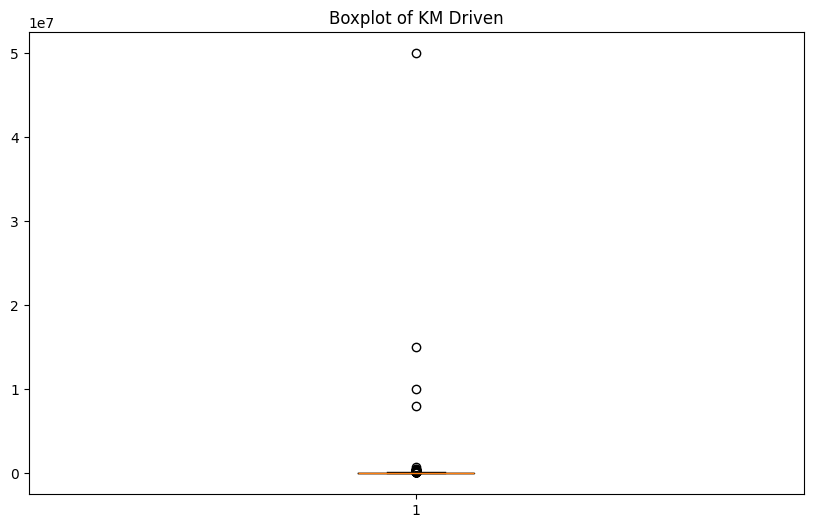

In [89]:
plt.figure(figsize=(10,6))
plt.boxplot(x='km_driven', data=data_clean)
plt.title('Boxplot of KM Driven')
plt.show()

In [90]:
data_clean.drop(data_clean[data_clean['km_driven'] > 800000 ].index, inplace=True)

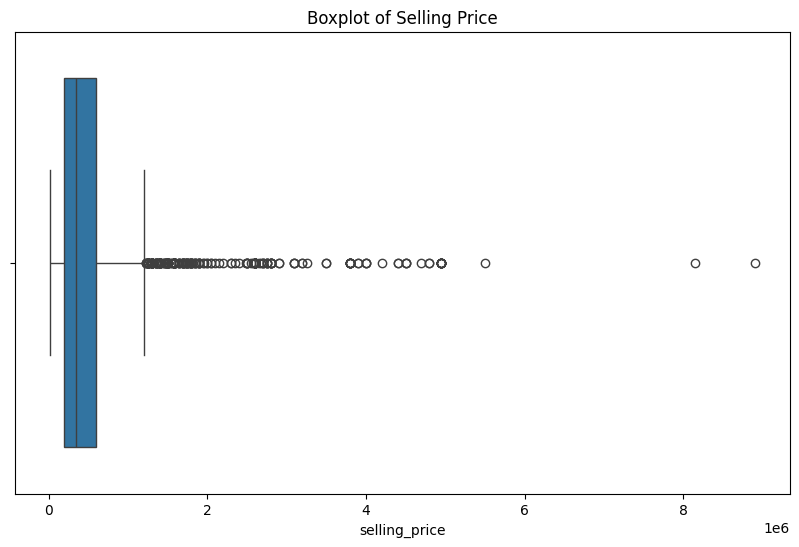

In [91]:
plt.figure(figsize=(10,6))
sns.boxplot(x='selling_price', data=data_clean)
plt.title('Boxplot of Selling Price')
plt.show()

In [92]:
data_clean['selling_price'].max()

np.float64(8900000.0)

In [93]:
data_clean.drop(data_clean[data_clean['selling_price'] > 7000000 ].index, inplace=True)

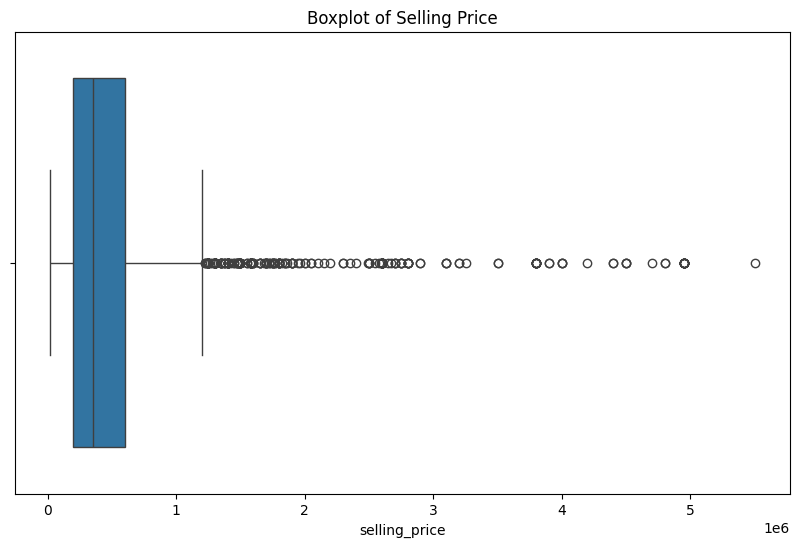

In [94]:
plt.figure(figsize=(10,6))
sns.boxplot(x='selling_price', data=data_clean)
plt.title('Boxplot of Selling Price')
plt.show()

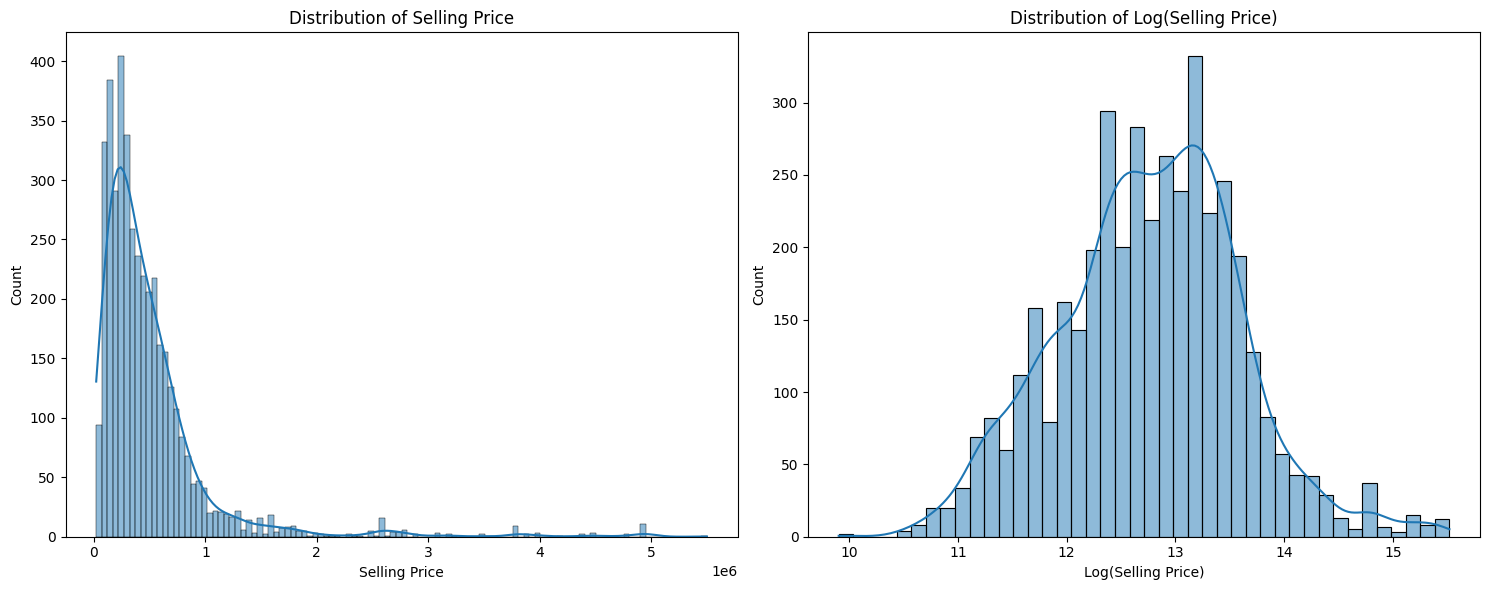

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.histplot(data_clean['selling_price'], kde=True)
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price')

plt.subplot(1, 2, 2)

sns.histplot(np.log1p(data_clean['selling_price']), kde=True)
plt.title('Distribution of Log(Selling Price)')
plt.xlabel('Log(Selling Price)')

plt.tight_layout()
plt.show()

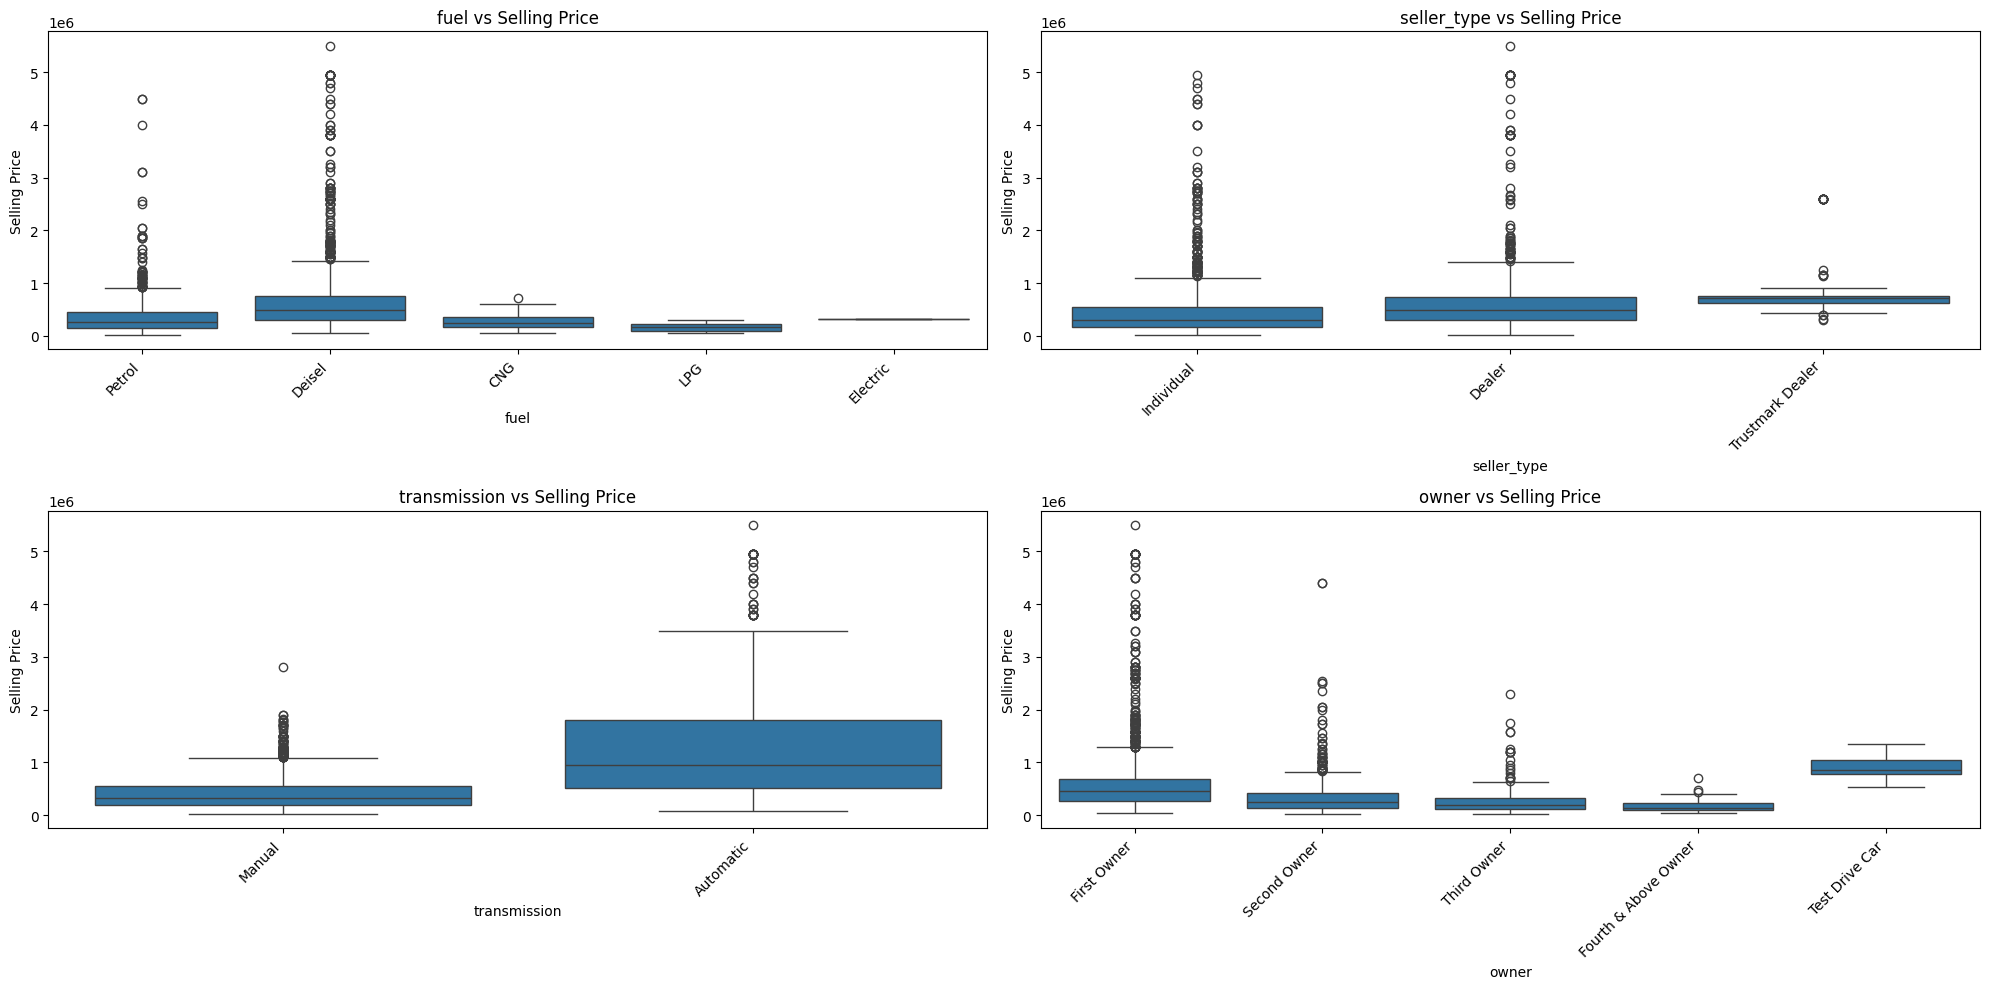

In [96]:

categorical_cols = ['fuel', 'seller_type', 'transmission', 'owner']

plt.figure(figsize=(20, 10))

for i, col in enumerate(categorical_cols):
    plt.subplot(2, 2, i + 1)
    
    sns.boxplot(x=col, y='selling_price', data=data_clean)
    plt.title(f'{col} vs Selling Price')
    plt.ylabel('Selling Price')
    plt.xlabel(col)
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

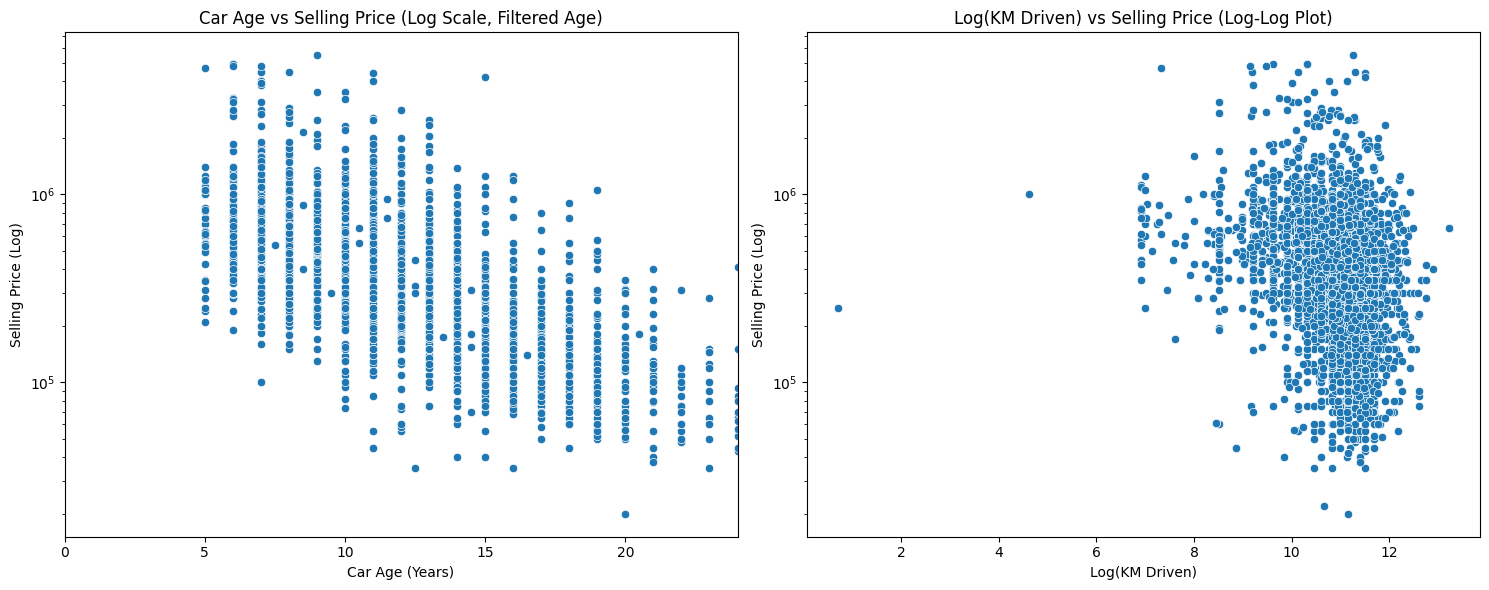

In [97]:
import numpy as np
data_clean['log_km_driven'] = np.log1p(data_clean['km_driven'])

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='car_age', y='selling_price', data=data_clean)
plt.yscale('log')

age_max = data_clean['car_age'].quantile(0.99)
plt.xlim(0, age_max)
plt.title('Car Age vs Selling Price (Log Scale, Filtered Age)')
plt.ylabel('Selling Price (Log)')
plt.xlabel('Car Age (Years)')

plt.subplot(1, 2, 2)
sns.scatterplot(x='log_km_driven', y='selling_price', data=data_clean) 
plt.yscale('log')
plt.title('Log(KM Driven) vs Selling Price (Log-Log Plot)')
plt.ylabel('Selling Price (Log)')
plt.xlabel('Log(KM Driven)')

plt.tight_layout()
plt.show()

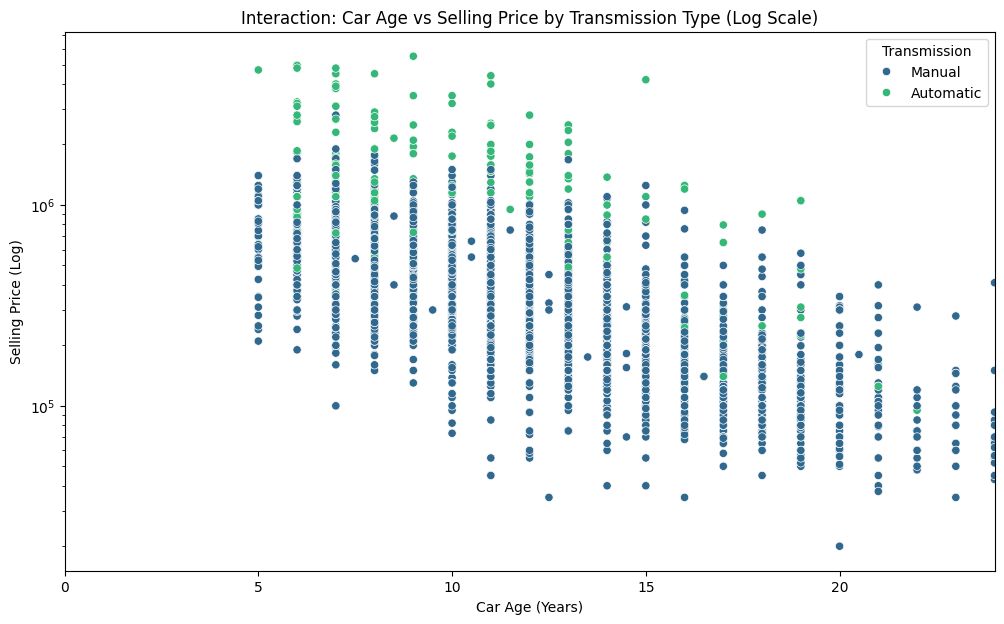

In [98]:

plt.figure(figsize=(12, 7))
sns.scatterplot(x='car_age', y='selling_price', hue='transmission', data=data_clean, palette='viridis')
plt.yscale('log')
plt.xlim(0, data_clean['car_age'].quantile(0.99)) 
plt.title('Interaction: Car Age vs Selling Price by Transmission Type (Log Scale)')
plt.ylabel('Selling Price (Log)')
plt.xlabel('Car Age (Years)')
plt.legend(title='Transmission')
plt.show()

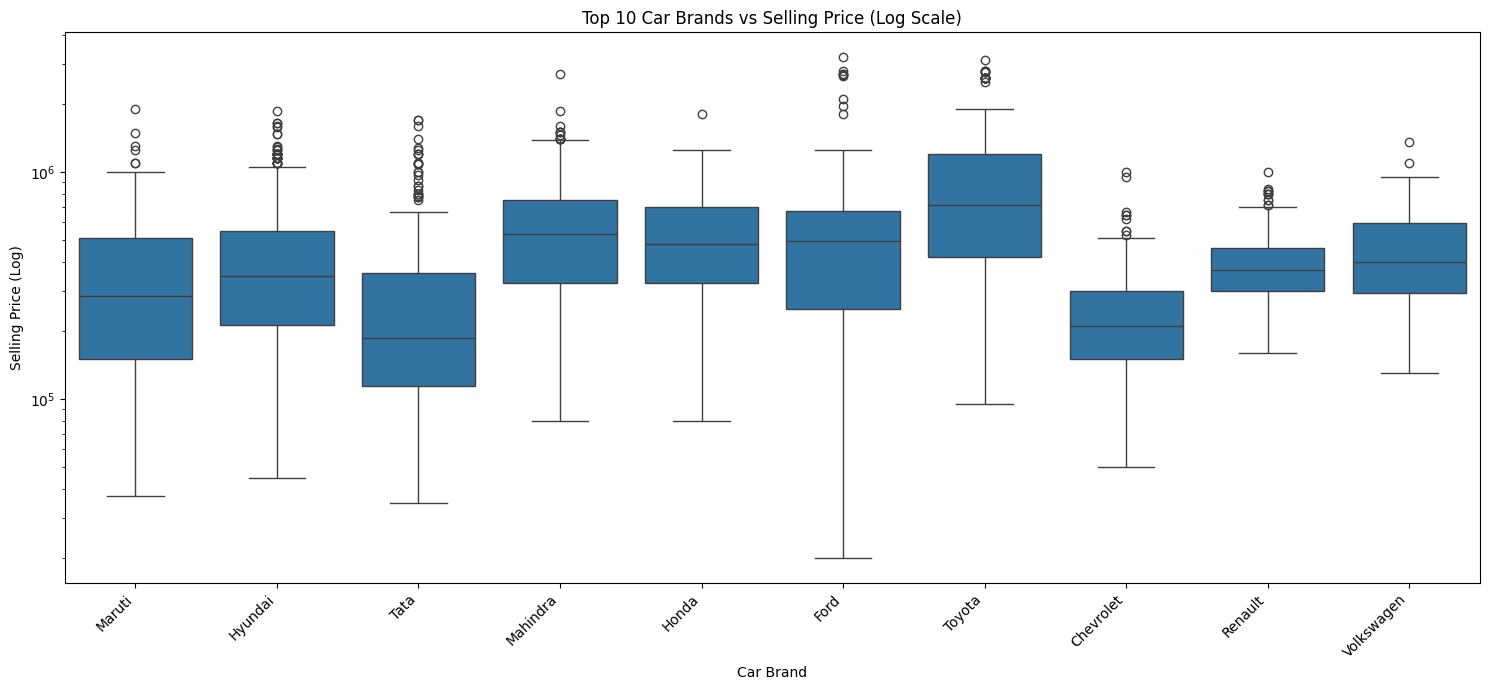

In [99]:

top_brands = data_clean['car_name'].value_counts().nlargest(10).index
brand_data = data_clean[data_clean['car_name'].isin(top_brands)]

plt.figure(figsize=(15, 7))
sns.boxplot(x='car_name', y='selling_price', data=brand_data, order=top_brands)
plt.yscale('log')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Car Brands vs Selling Price (Log Scale)')
plt.ylabel('Selling Price (Log)')
plt.xlabel('Car Brand')
plt.tight_layout()
plt.show()


In [100]:
data_clean.to_csv("..\dashboard\clean_data.csv", index=False)